<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
data = pd.read_csv('country_vaccinations.csv')
data.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [4]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [5]:
data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

## EDA

In [6]:
data['source_name'].nunique()

92

In [7]:
data['source_website'].nunique()

148

In [8]:
data['iso_code'].nunique()

218

In [9]:
data['country'].nunique()

218

In [10]:
cleanData = data[['country','date','vaccines','daily_vaccinations','daily_vaccinations_per_million']]
cleanData

,country,date,vaccines,daily_vaccinations,daily_vaccinations_per_million
0,Afghanistan,2021-02-22,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",NaN,NaN
1,Afghanistan,2021-02-23,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1367.0,35.0
2,Afghanistan,2021-02-24,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1367.0,35.0
3,Afghanistan,2021-02-25,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1367.0,35.0
4,Afghanistan,2021-02-26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1367.0,35.0
...,...,...,...,...,...
31235,Zimbabwe,2021-07-11,Sinopharm/Beijing,18598.0,1251.0
31236,Zimbabwe,2021-07-12,Sinopharm/Beijing,23205.0,1561.0
31237,Zimbabwe,2021-07-13,Sinopharm/Beijing,27567.0,1855.0
31238,Zimbabwe,2021-07-14,Sinopharm/Beijing,30698.0,2065.0


## Data Preprocessing

### Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
cleanData['country']=le1.fit_transform(cleanData['country'])
le2 = LabelEncoder()
cleanData['date']=le2.fit_transform(cleanData['date'])
le3 = LabelEncoder()
cleanData['vaccines']=le3.fit_transform(cleanData['vaccines'])
cleanData

,country,date,vaccines,daily_vaccinations,daily_vaccinations_per_million
0,0,82,17,114971.789486,3426.365969
1,0,83,17,1367.000000,35.000000
2,0,84,17,1367.000000,35.000000
3,0,85,17,1367.000000,35.000000
4,0,86,17,1367.000000,35.000000
...,...,...,...,...,...
31235,217,221,50,18598.000000,1251.000000
31236,217,222,50,23205.000000,1561.000000
31237,217,223,50,27567.000000,1855.000000
31238,217,224,50,30698.000000,2065.000000


### Missing values

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(cleanData[['daily_vaccinations','daily_vaccinations_per_million']])
cleanData[['daily_vaccinations','daily_vaccinations_per_million']] = imputer.transform(cleanData[['daily_vaccinations','daily_vaccinations_per_million']])

In [13]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         31240 non-null  int32  
 1   date                            31240 non-null  int32  
 2   vaccines                        31240 non-null  int32  
 3   daily_vaccinations              31240 non-null  float64
 4   daily_vaccinations_per_million  31240 non-null  float64
dtypes: float64(2), int32(3)
memory usage: 854.3 KB


## Visualization

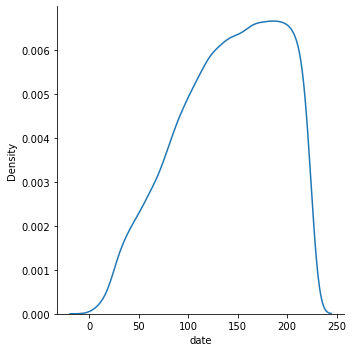

In [14]:
sns.displot(cleanData,x='date',kind='kde')

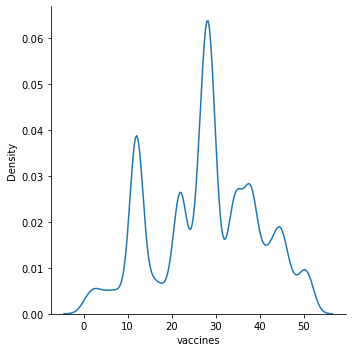

In [15]:
sns.displot(cleanData,x='vaccines',kind='kde')

<AxesSubplot:>

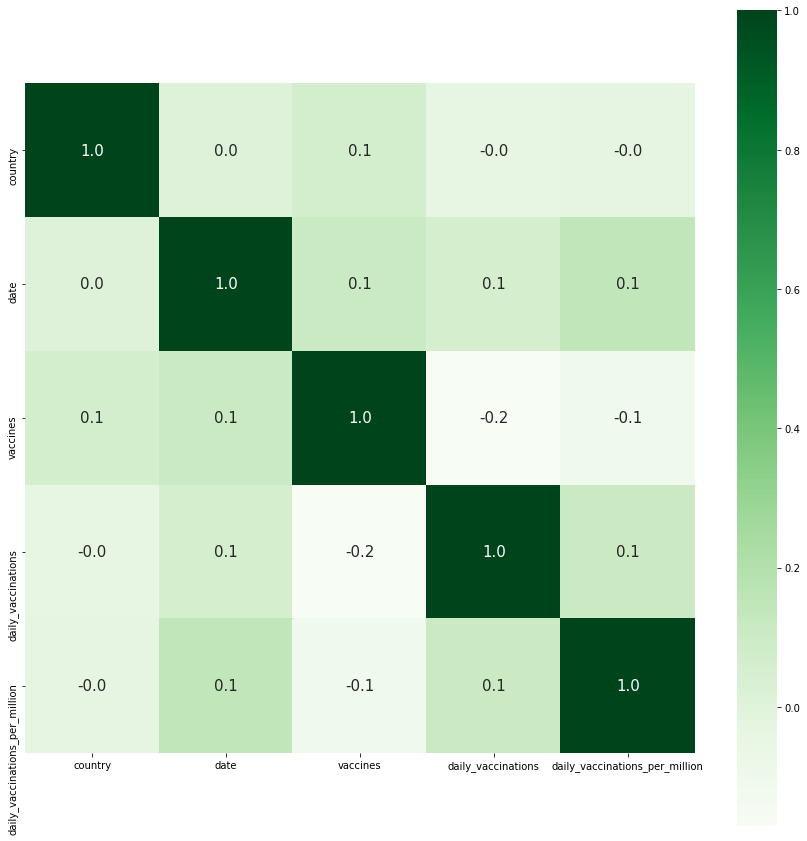

In [16]:
cleanData_corr = cleanData.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cleanData_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Prepare Data for Machine learning

In [17]:
X = cleanData.drop(['daily_vaccinations','daily_vaccinations_per_million'],axis=1)
y = cleanData['daily_vaccinations']

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Train your model

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
slr = LinearRegression()
accuracies = cross_val_score(estimator = slr, X = X_train, y = y_train, cv = 10)
print('Best R^2 :',accuracies.mean())
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_train_pred))

Best R^2 : 0.03278328662804486
R^2: 0.03571406581393555


### Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10)
   

X_train_quadratic = poly_features.fit_transform(X_train)
   

quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
accuracies = cross_val_score(estimator = quadratic, X = X_train_quadratic, y = y_train, cv = 10)
print('Best R^2:',accuracies.mean())
y_train_predicted_quad = quadratic.predict(X_train_quadratic)
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))
print('R^2:',metrics.r2_score(y_train, y_train_predicted_quad))
print('R^2:',metrics.r2_score(y_test, y_test_predicted))

Best R^2: 0.6427760390487627
R^2: 0.7066195546363409
R^2: 0.4925823848906953


### SVR

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [23]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
classifier=SVR()

In [24]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)

In [25]:
grid_search.fit(X_train, y_train)
y_rbf = grid_search.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_rbf))

R^2: -0.015495113147644624


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_train_predd = regressor.predict(X_train)
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

In [27]:
print('R^2:',accuracies.mean())
print('R^2:',metrics.r2_score(y_train, y_train_predd))

R^2: 0.9967790351999979
R^2: 1.0


In [28]:
y_test_predd = regressor.predict(X_test)

In [29]:
print('R^2:',metrics.r2_score(y_test, y_test_predd))

R^2: 0.9964719613386264


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400, random_state = 0)
regressor.fit(X_train,y_train)
y_train_forest = regressor.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_train_forest))
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print('Best R^2:',accuracies.mean())

R^2: 0.9998040430023047
Best R^2: 0.9980018135986397


In [31]:
y_test_forest = regressor.predict(X_test)
print('R^2:',metrics.r2_score(y_test, y_test_forest))

R^2: 0.9972449925225393


### XGBoost

In [32]:
reg_mod = xgb.XGBRegressor(
    n_estimators=5000,
    booster='dart',
    learning_rate=0.1,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=10,
    gamma=0.4,
)
reg_mod.fit(X_train, y_train)
y_train_xgb = reg_mod.predict(X_train)
accuracies = cross_val_score(estimator = reg_mod, X = X_train, y = y_train, cv = 10)
print('Best R^2:',accuracies.mean())
print('R^2:',metrics.r2_score(y_train, y_train_xgb))

Best R^2: 0.9980439957223322
R^2: 0.999999999932608


In [33]:
y_test_xgb = reg_mod.predict(X_test)
print('R^2:',metrics.r2_score(y_test, y_test_xgb))

R^2: 0.9978307510661076
